In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset Characteristics**

* Product Purchased: KP281, KP481 and KP781, are the product code for the treadmill purchased by the customer.
* Age : In years, age of the customers.
* Gender: Gender of the purchased customers Male/Female.
* Education: represented in years.
* Marital Status: Single or partnered.
* Usage: The average number of times per week that the customer plans to use the treadmill.
* Fitness: Self rated fitness of the user rated from 1 (as poor shape) to 5 (as excellent shape).
* Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most people is almost 115 and -minimum is 21.
* Income: Most customer earns around 58K annually, with maximum of 104K and minimum almost 30K.

In [3]:
df.shape

(180, 9)

data contains 180 rows & 9 columns

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Product, Gender and Marital Status are object| Age, Education, Usage, Fitness, Income and Miles are in int64(integer)

In [5]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


* There are 3 unique products in the dataset.
* KP281 is the most frequent product.
* Minimum & Maximum age of the person is 18 & 50, mean is 28.79 & 75% of persons have age less than or equal to 33.
* Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
* Out of 180 data points, 104's gender is Male and rest are the female.
* Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

**Non-Graphical Analysis: Value counts and unique attributes**

In [6]:
# Total number of unique values in dataframe
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [7]:
# list of unique product ids
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
# list of unique Age
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [9]:
# list of unique Income
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [10]:
# list of unique usage
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [11]:
# list of unique Fitness
df['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [12]:
# list of unique Miles
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [13]:
# list of unique Education
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [14]:
# Number of different product type
product_count = df["Product"].value_counts().reset_index()
product_count.columns = ['Product','Counts']
product_count

,Product,Counts
0,KP281,80
1,KP481,60
2,KP781,40


In [15]:
# Number of Male and Female customers
gender_count = df["Gender"].value_counts().reset_index()
gender_count.columns = ['Gender','Counts']
gender_count

,Gender,Counts
0,Male,104
1,Female,76


In [16]:
# Number of Single and Partnered customers
status_count = df['MaritalStatus'].value_counts().reset_index()
status_count.columns = ['MaritalStatus','Counts']
status_count

,MaritalStatus,Counts
0,Partnered,107
1,Single,73


In [17]:
# Number of customer againts the Fitness scale 1 to 5
Fitness_count = df['Fitness'].value_counts().reset_index()
Fitness_count.columns = ['Fitness', 'Count']
Fitness_count

,Fitness,Count
0,3,97
1,5,31
2,2,26
3,4,24
4,1,2


In [18]:
# Number of customer againts the usage scale 1 to 5
Usage_count = df['Usage'].value_counts().reset_index()
Usage_count.columns = ['Usage', 'Count']
Usage_count

,Usage,Count
0,3,69
1,4,52
2,2,33
3,5,17
4,6,7
5,7,2


**Non-Graphical and Visual Analysis**

In [19]:
(df.Product.value_counts()/len(df)*100).round(2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

Probability of buying KP281, KP481 & KP781 are 44.44, 33.33 & 22.22 respectively.

In [20]:
(df.MaritalStatus.value_counts()/len(df)*100).round(2)

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

* Probability of Married/Partnered is 59.44%
* Probability of Single is 40.56%

In [21]:
(df.Gender.value_counts()/len(df)*100).round(2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

* Probability of Male customer is 57.78%
* Probability of Female customer is 42.22%

In [22]:
(df.Usage.value_counts()/len(df)*100).round(2)

3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: Usage, dtype: float64

In [23]:
(df.Fitness.value_counts()/len(df)*100).round(2)

3    53.89
5    17.22
2    14.44
4    13.33
1     1.11
Name: Fitness, dtype: float64

**Visual Analysis - Univariate & Bivariate**

**Univariate Analysis**

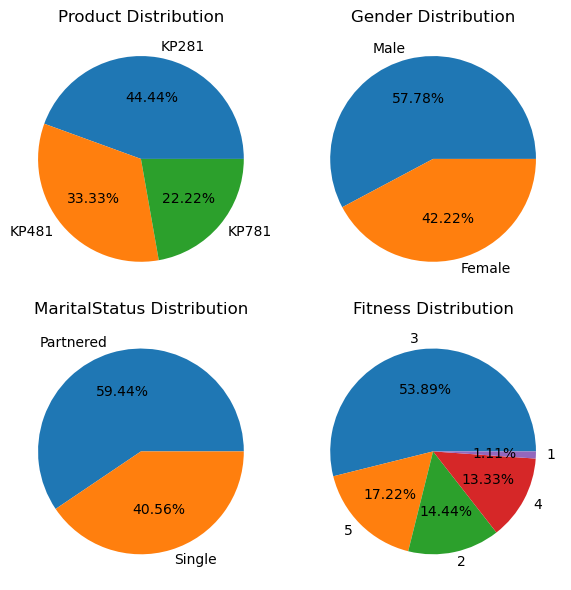

In [24]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

# Pie chart for 'Product'
axs[0, 0].pie(df['Product'].value_counts(), labels=df['Product'].value_counts().index, autopct='%.2f%%')
axs[0, 0].set_title('Product Distribution')

# Pie chart for 'Gender'
axs[0, 1].pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%.2f%%')
axs[0, 1].set_title('Gender Distribution')

# Pie chart for 'MaritalStatus'
axs[1, 0].pie(df['MaritalStatus'].value_counts(), labels=df['MaritalStatus'].value_counts().index, autopct='%.2f%%')
axs[1, 0].set_title('MaritalStatus Distribution')

# Pie chart for 'Fitness'
axs[1, 1].pie(df['Fitness'].value_counts(), labels=df['Fitness'].value_counts().index, autopct='%.2f%%')
axs[1, 1].set_title('Fitness Distribution')

plt.tight_layout()
plt.show()

**Product**
* 44.44% of the customers have purchased KP2821 product.
* 33.33% of the customers have purchased KP481 product.
* 22.22% of the customers have purchased KP781 product.

**Gender**
* 57.78% of the customers are Male.

**MaritalStatus**
* 59.44% of the customers are Partnered

**Fitness**
* 53.89% of the customers are 3 scale.

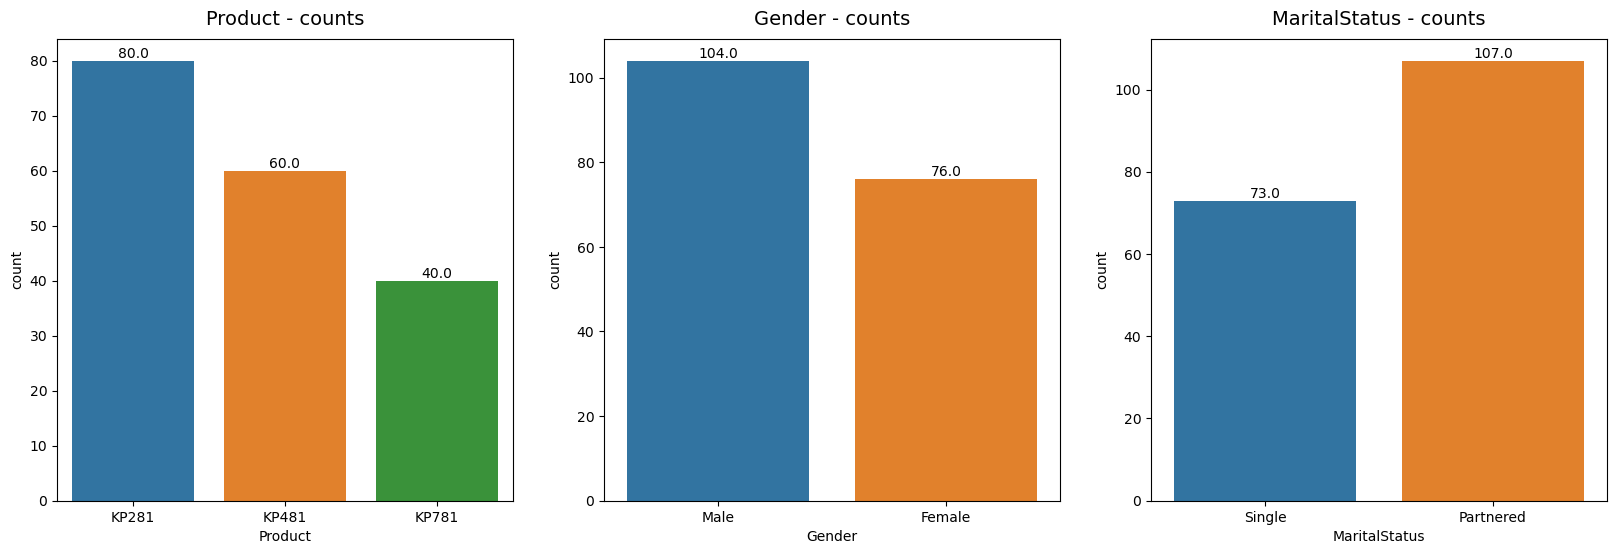

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
for p in axs[0].patches:
    axs[0].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.countplot(data=df, x='Gender', ax=axs[1])
for p in axs[1].patches:
    axs[1].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

sns.countplot(data=df, x='MaritalStatus', ax=axs[2])
for p in axs[2].patches:
    axs[2].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

**Product**
* KP281 is the most commonly purchase product type
* KP481 is the second most top product type purchased
* KP781 is the least purchased product type

**Gender**
* Most products purchased by Males, as compared to females

**Marital Status**
* Most products purchased by couples/Married/Partnered customer category

<function matplotlib.pyplot.show(close=None, block=None)>

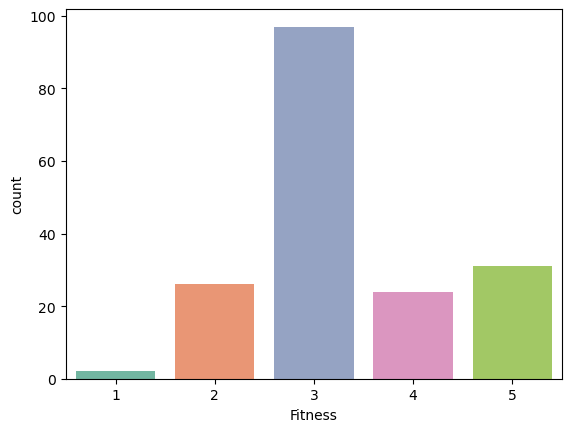

In [26]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness',palette="Set2")
plt.show

More than **90** customers have rated their physical fitness rating as **Average**.
**Excellent shape** is the second highest rating.

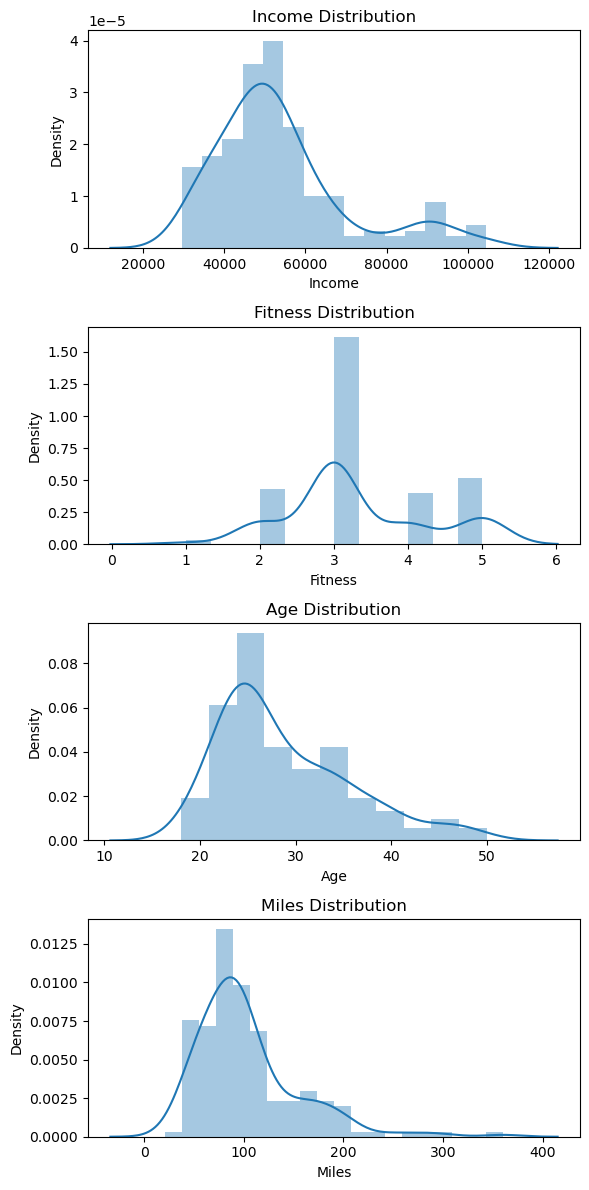

In [27]:
fig, axes = plt.subplots(4, 1, figsize=(6, 12))

# Income Analysis - Distplot
sns.distplot(df['Income'], ax=axes[0])
axes[0].set_title("Income Distribution")

# Fitness Rating Analysis - Distplot
sns.distplot(df['Fitness'], ax=axes[1])
axes[1].set_title("Fitness Distribution")

# Age Analysis - Distplot
sns.distplot(df['Age'], ax=axes[2])
axes[2].set_title("Age Distribution")

# Miles Analysis - Distplot
sns.distplot(df['Miles'], ax=axes[3])
axes[3].set_title("Miles Distribution")

plt.tight_layout()
plt.show()

* Most of customers who have purchased the product have a average income between **40K** to **60K**. & density is over **3.0**
* Over **1.5** density customer population have rated their physical fitness rating as **Average**.

Text(0.5, 1.0, 'Income Distribution')

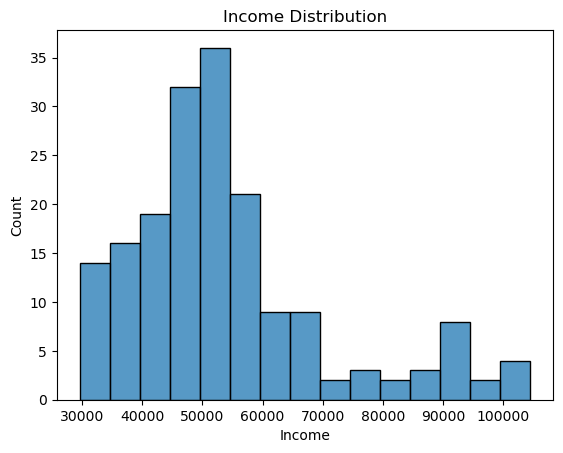

In [28]:
sns.histplot(df['Income'])
plt.title("Income Distribution")

* More than **35** customers earn **50-55K** per year
* More than **30** customers earn **45-50K** per year
* More than **20** customers earn **55-60K** per year

Text(0.5, 1.0, 'Education Distribution')

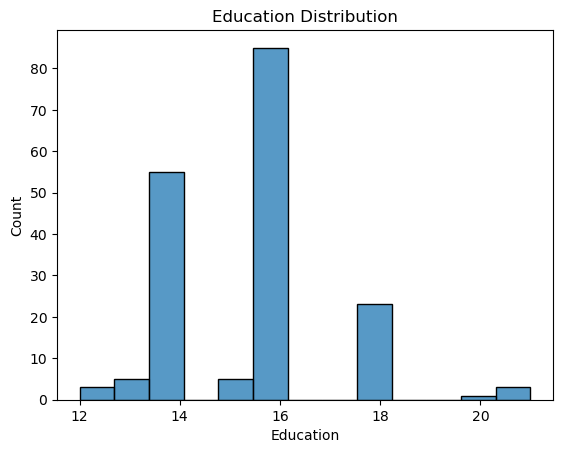

In [29]:
sns.histplot(df, x='Education')
plt.title("Education Distribution")

* Highest number of customers have **16** years as their Education.
* **14** years is the second highest education.
* **20** years is the least education.

Text(0.5, 1.0, 'Fitness Distribution')

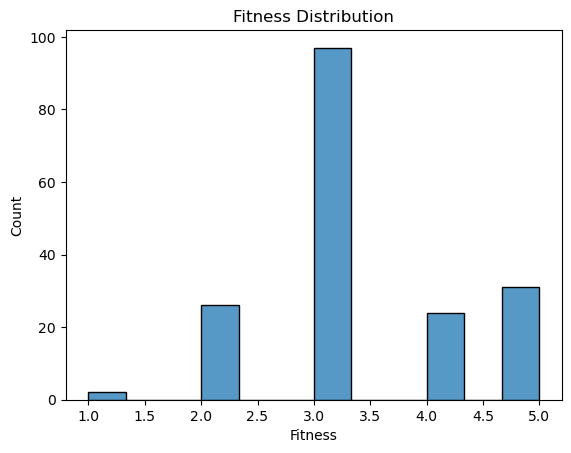

In [30]:
sns.histplot(df, x='Fitness')
plt.title("Fitness Distribution")

* Highest number of customers rated **3** (Average) themselfs.
* Arround **30** customes have rated **5** (Excellent shape) which is a Second highest rating. 

**BOX PLOT**

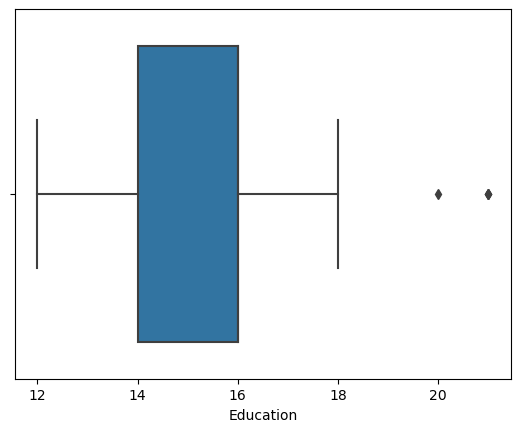

In [31]:
sns.boxplot(df, x='Education')
plt.show()

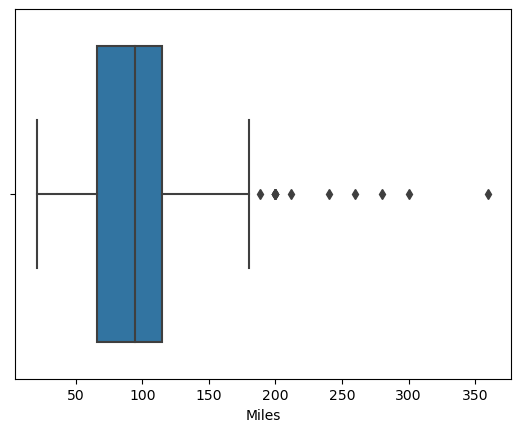

In [32]:
sns.boxplot(df, x='Miles')
plt.show()

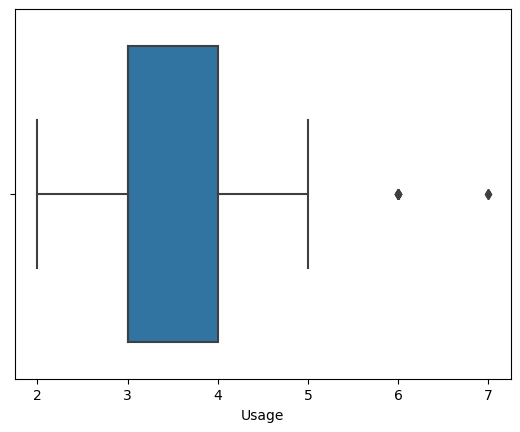

In [33]:
sns.boxplot(df, x='Usage')
plt.show()

* 3 to 4 days is the most preferred usage days for customers
* 6 and 7 days per week is roughly the usage days for few customers (Outliers)

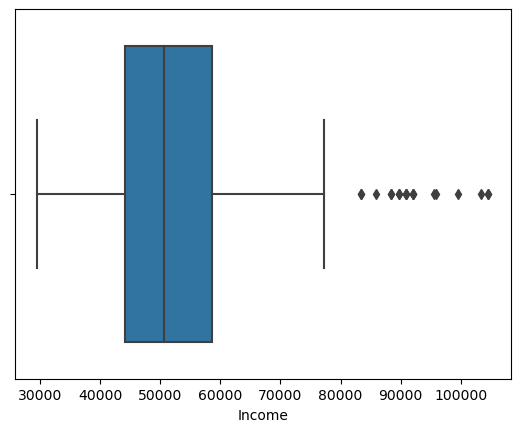

In [34]:
sns.boxplot(df, x='Income')
plt.show()

* Majority of customers have an annual income ranging from **45K** to approximately **60K**
* Few customers who have incomes above **80K** per annum, which can be considered as outliers.

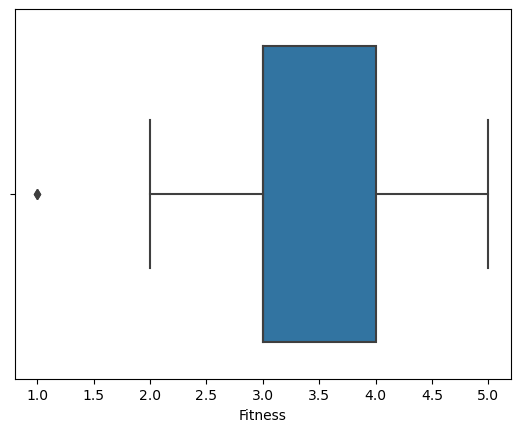

In [35]:
sns.boxplot(df, x='Fitness')
plt.show()

* Couple of customers have rated their fitness rating as 1 - Poor Shape
* Most customers have rated fitness rating as 3.0 to 4.0

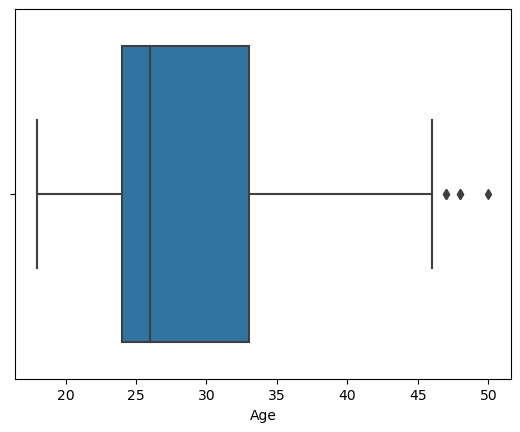

In [36]:
sns.boxplot(df, x='Age')
plt.show()

* **23** to **34** is the most common customer age group that has purchased the product
* Above **45** years old customers are very few compared to the young age group given in the dataset

**PAIR PLOT**

* to show relationships between different variables.
* Additionally, ensure that the DataFrame df contains the numerical variables which we want to visualize in the pair plot.

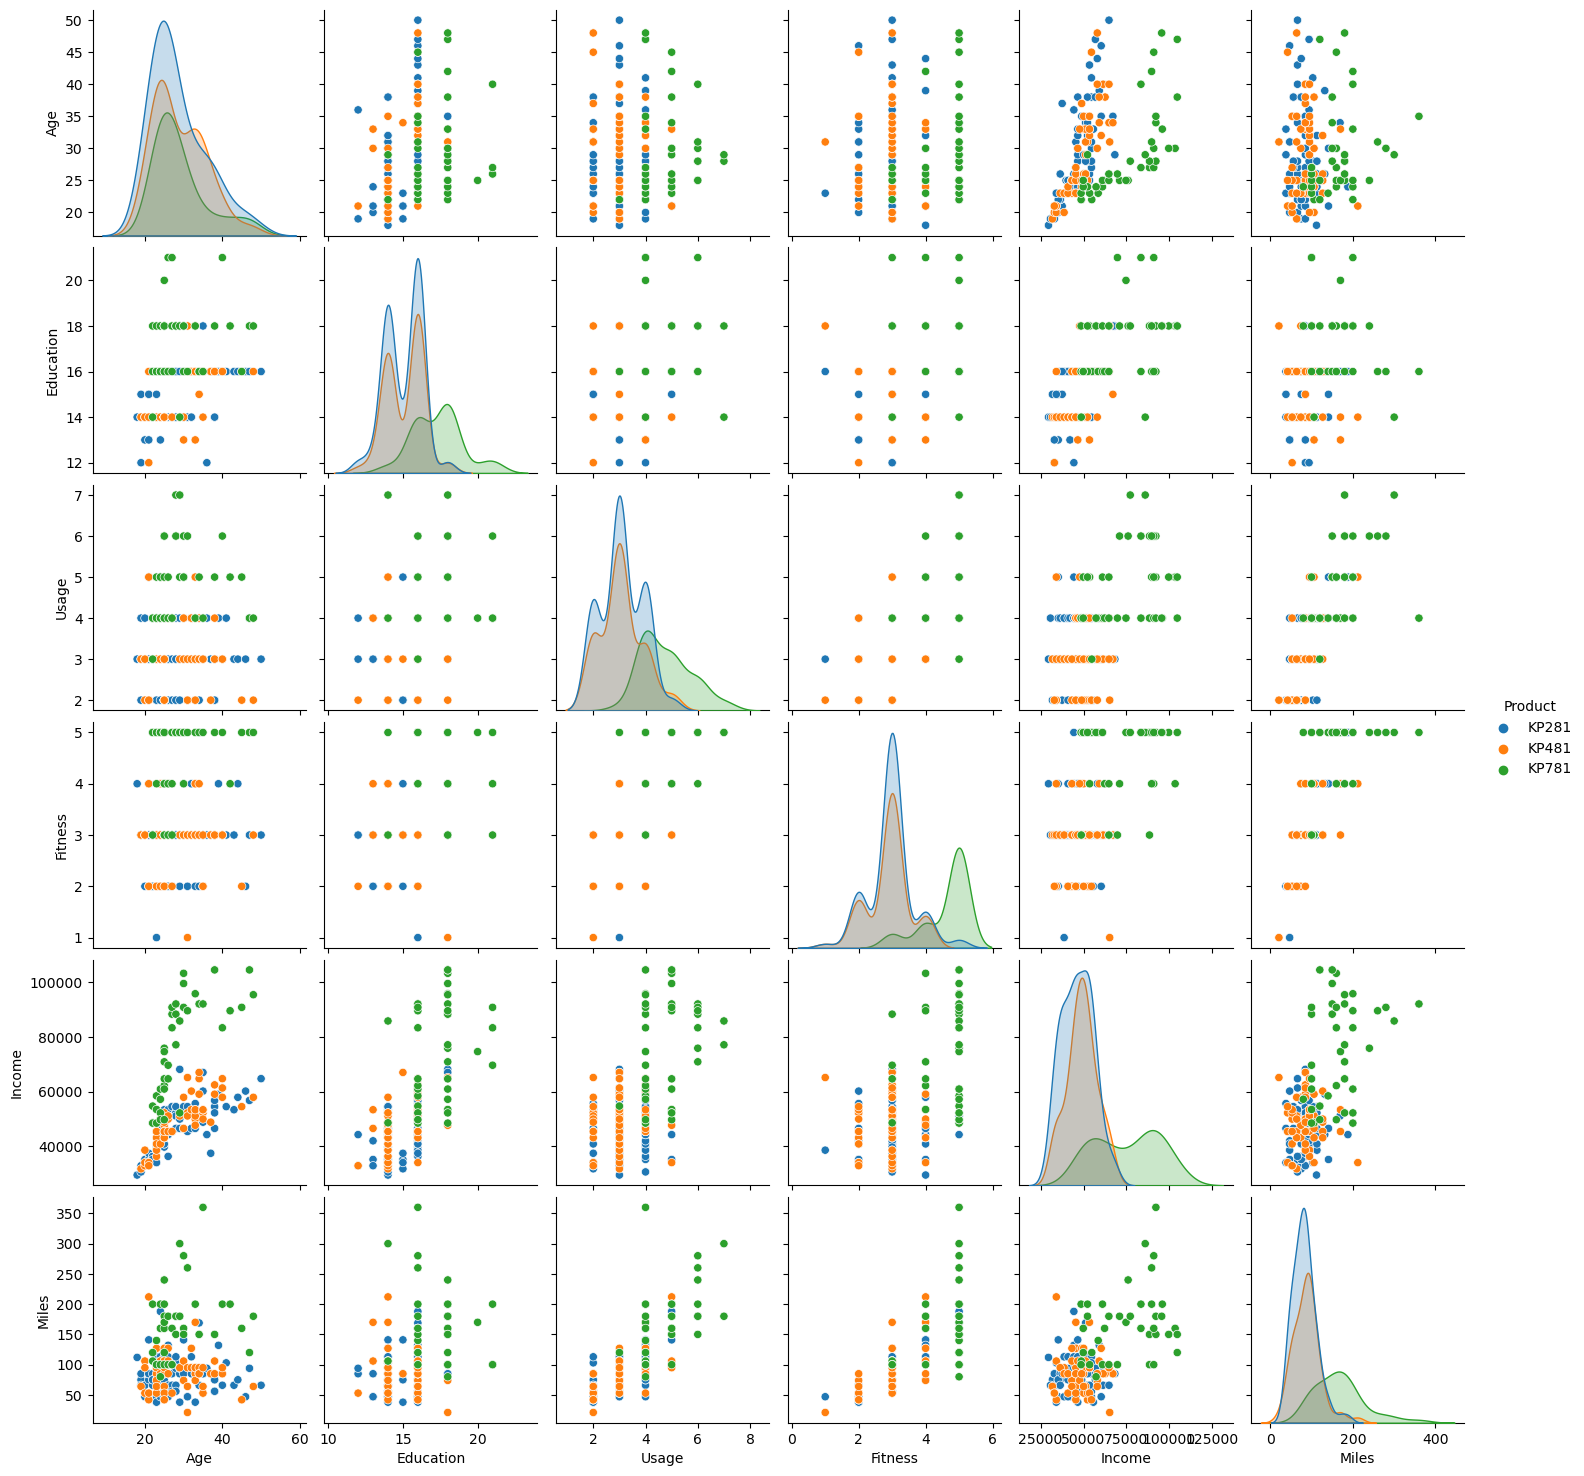

In [37]:
sns.pairplot(df, hue ='Product')

In the above pairplot the correlation with products and different attributes

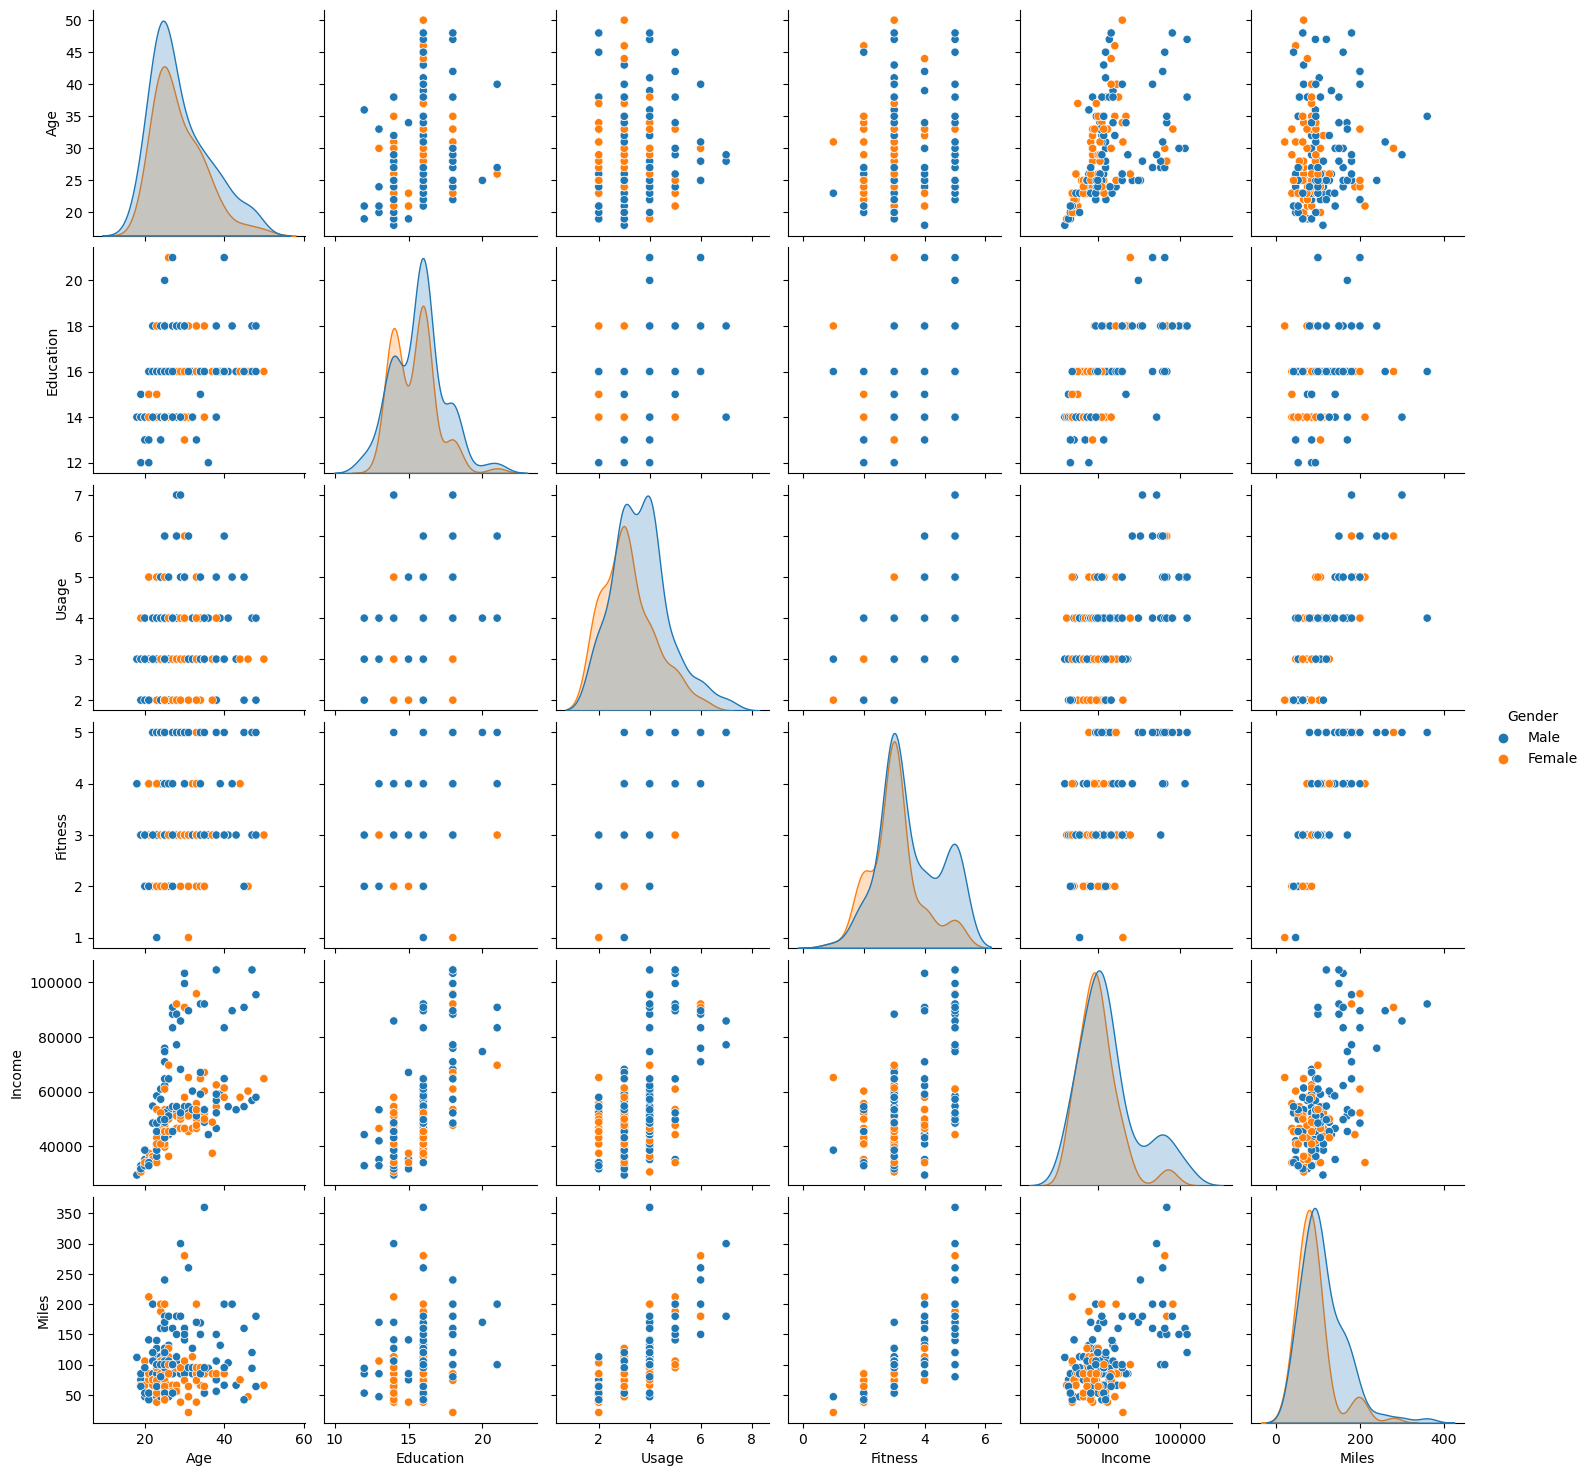

In [38]:
sns.pairplot(df, hue ='Gender')

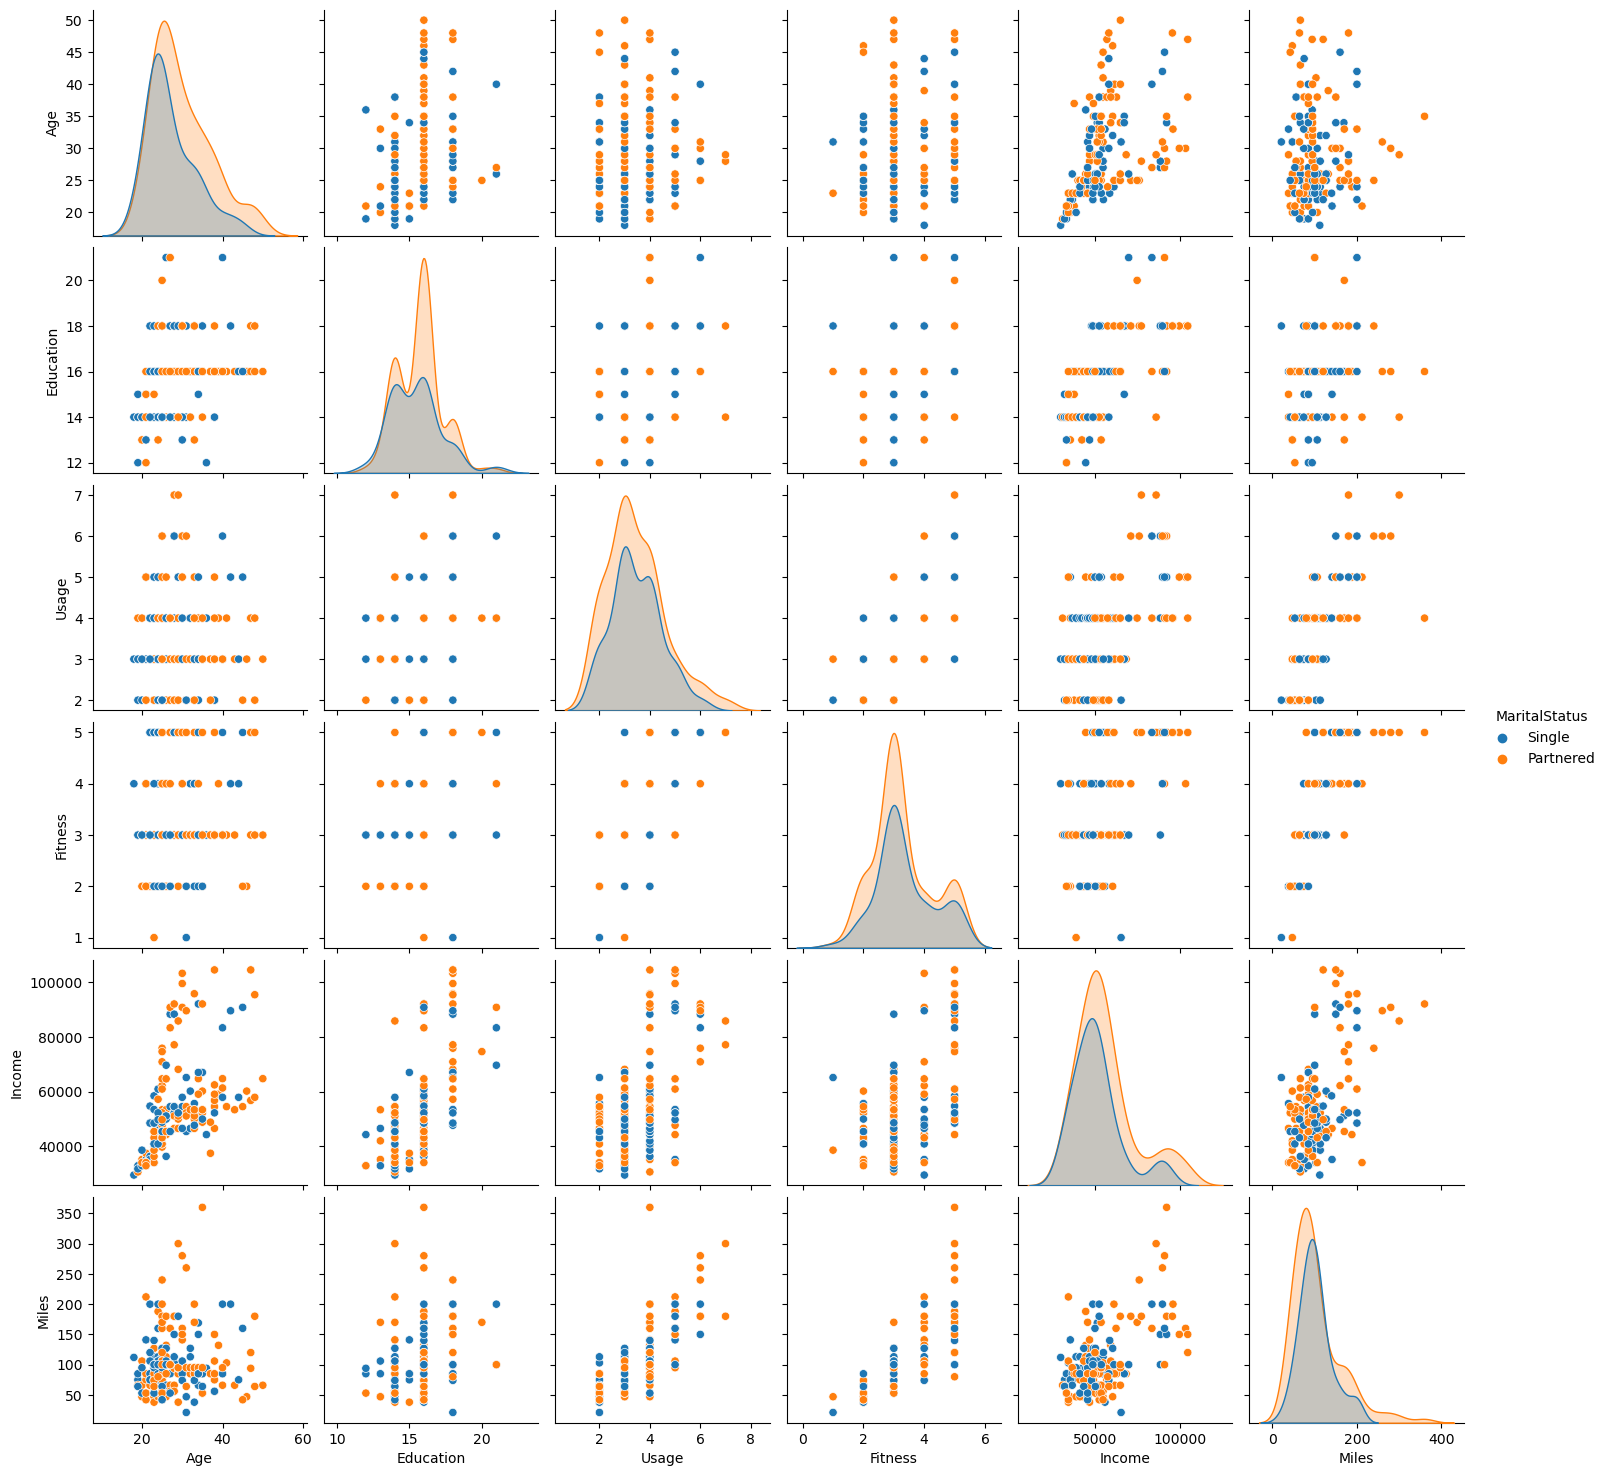

In [39]:
sns.pairplot(df, hue ='MaritalStatus')

**HEATMAP**

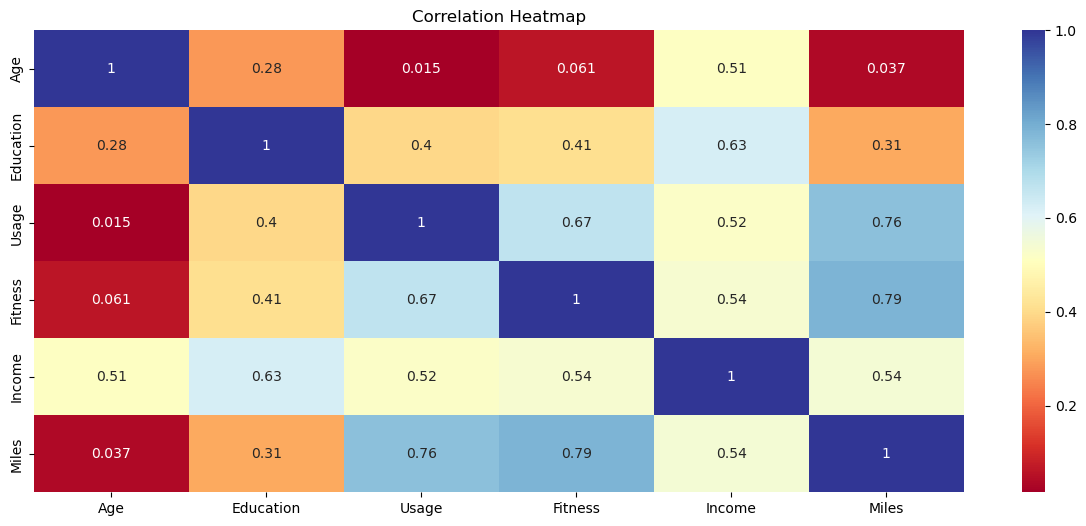

In [40]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()

* In the above heatmap linear relationship between data points is evaluated
* Correlation between Age and Miles is 0.03
* Correlation between Education and Income is 0.63 
* Correlation between Usage and Fitness is 0.67 
* Correlation between Fitness and Age is 0.06 
* Correlation between Income and Usage is 0.52

**Bivariate Analysis**

Text(0.5, 1.0, 'Product vs Gender')

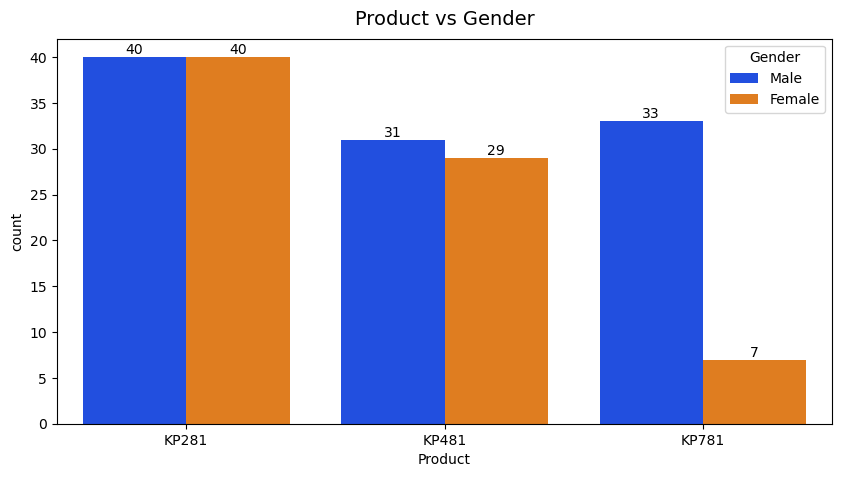

In [41]:
# Product purchased among Male and Female
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Product', hue='Gender', data=df, palette='bright')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Product vs Gender", pad=10, fontsize=14)

* The depicted graph reveals that the treadmill model **KP281** is predominantly favored by male & female.
* while **KP781** is the second choice by male.
* In contrast, females least preference for **KP781**.

Text(0.5, 1.0, 'Product vs MaritalStatus')

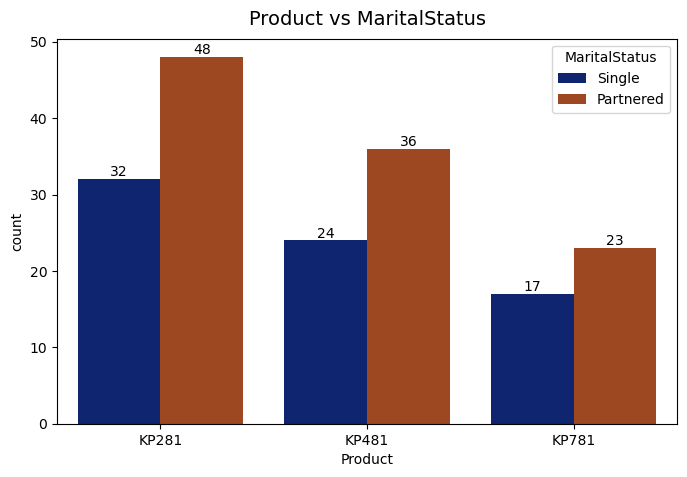

In [42]:
# Product purchased among Married/Partnered and Single
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Product', hue='MaritalStatus', data=df, palette='dark')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Product vs MaritalStatus", pad=10, fontsize=14)

* KP281 is the most preferred product among customers.
* KP481 is the second most preferred product among the customers.
* Between Singles and Partnered, Partnered customers are the major product purchasers.

Text(0.5, 1.0, 'Gender vs MaritalStatus')

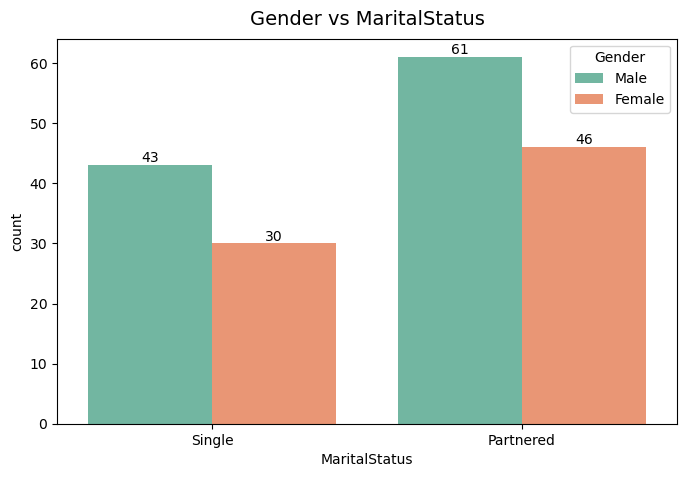

In [43]:
# Count among Gender and their Marital Status
plt.figure(figsize=(8,5))
ax = sns.countplot(x='MaritalStatus', hue='Gender', data=df, palette='Set2')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender vs MaritalStatus", pad=10, fontsize=14)

* Partnered customers are the most buyers of aerofit product
* Male customers are significantly high.
* Female customers are considerably low compared to Male customers.

Text(0.5, 1.0, 'Fitness Distribution on Gender')

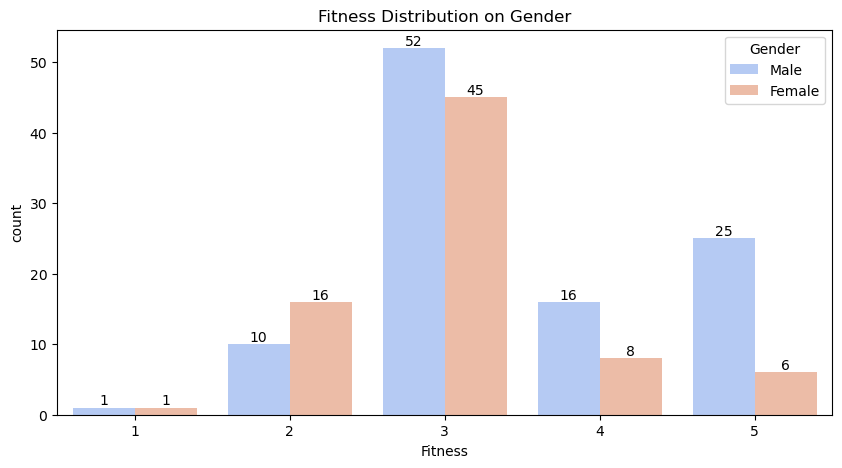

In [44]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x ='Fitness', hue = 'Gender', data=df, palette='coolwarm')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title('Fitness Distribution on Gender')

* The majority of both male and female individuals received an average fitness rating.
* A considerable proportion of **male** customers are in excellent physical condition in comparison to female customers.

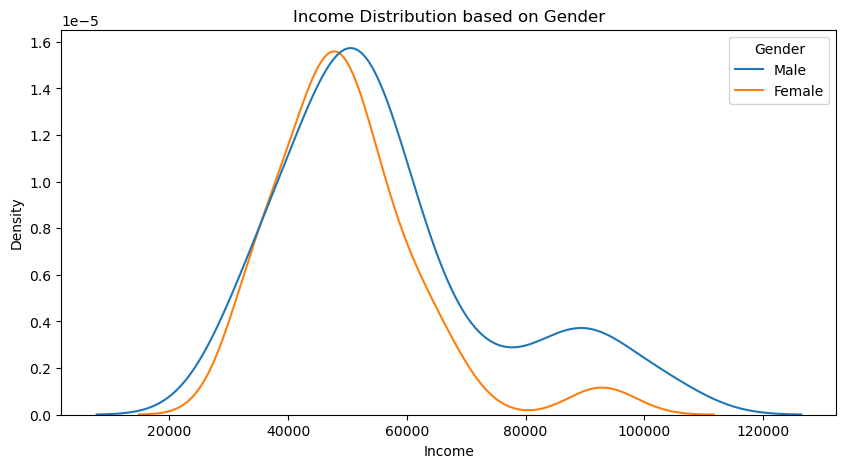

In [45]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.title('Income Distribution based on Gender')
plt.show()

Based on the above diagram, it can be inferred that the income range between **40,000** and **80,000** is the most frequently observed annual income among the customers.

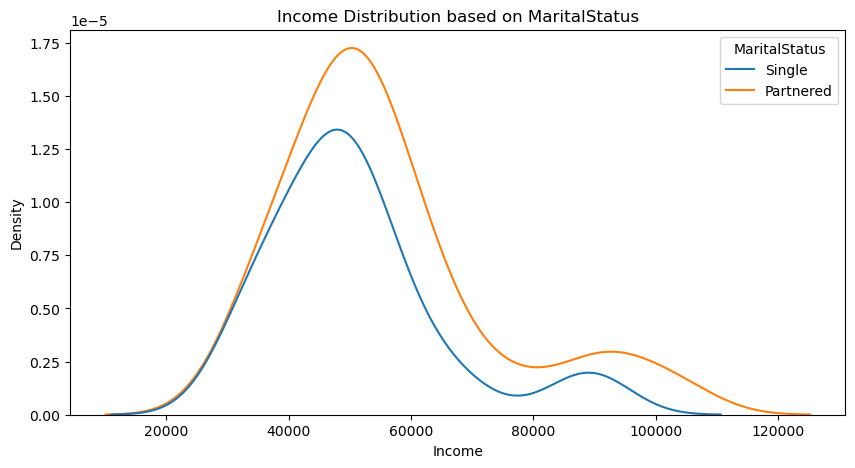

In [46]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Income',hue='MaritalStatus')
plt.title('Income Distribution based on MaritalStatus')
plt.show()

with the above graph its visible that partnered earn more.

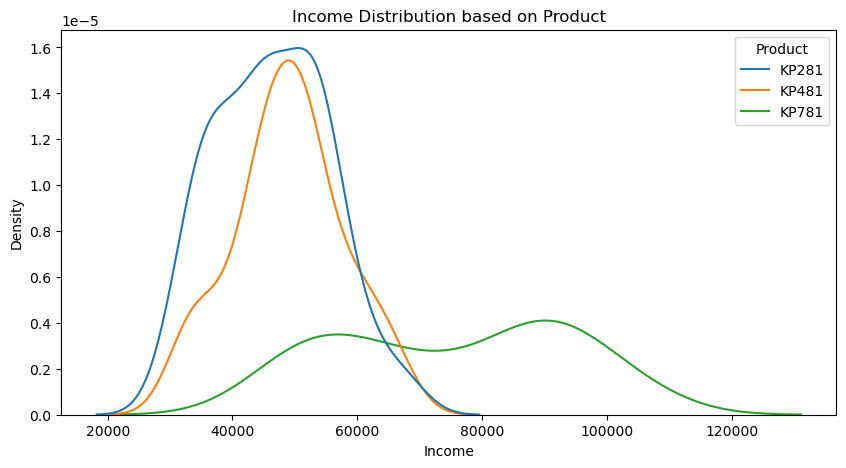

In [47]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Income',hue='Product')
plt.title('Income Distribution based on Product')
plt.show()

The above graph shows that 
KP281 customers are in range of 20k to 80k salary.
KP481 customers are also from same range but the density is different from KP281

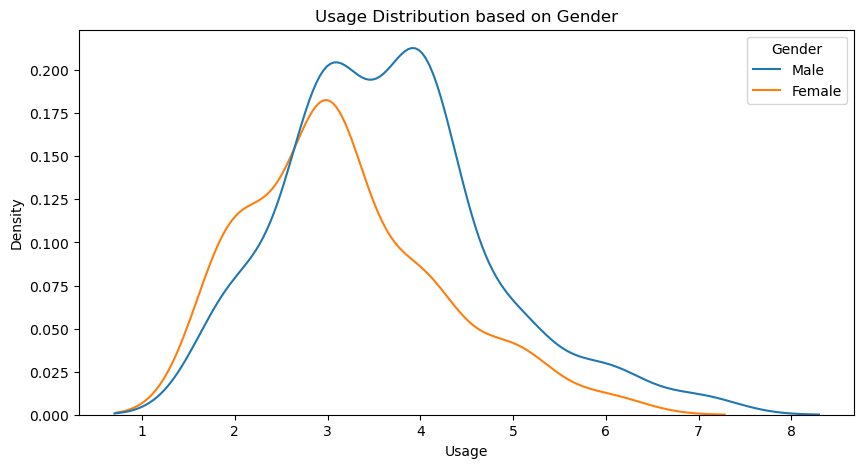

In [48]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(10,5))
sns.kdeplot(data=df,x='Usage',hue='Gender')
plt.title('Usage Distribution based on Gender')
plt.show()

* Male customers usage is significantly higher the female customer
* Female customer's lack consistency after the 3 days per week

Text(0.5, 1.0, 'Education data against Age of the customer')

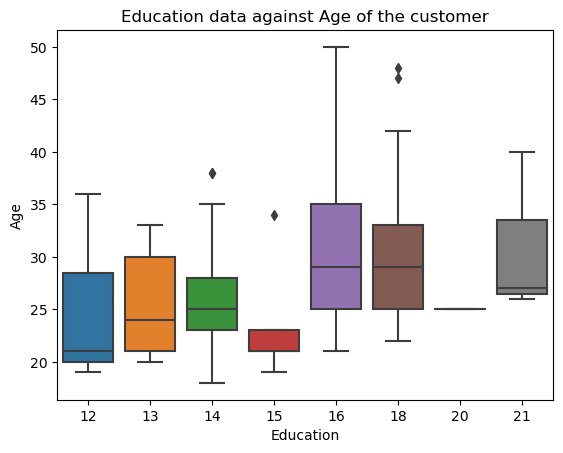

In [49]:
sns.boxplot(x='Education',y='Age',data=df)
plt.title('Education data against Age of the customer')

Text(0.5, 1.0, 'Product data against Age of the customer')

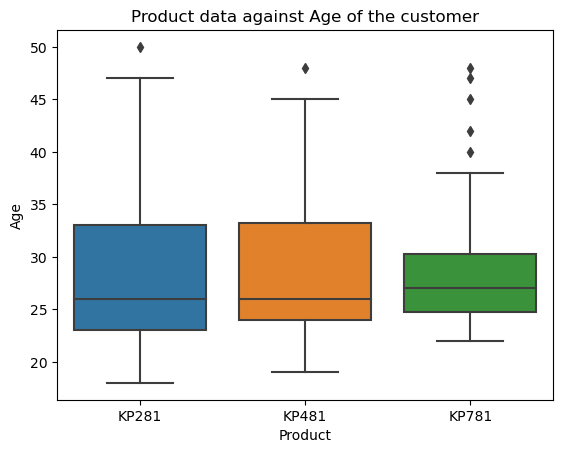

In [50]:
sns.boxplot(x='Product',y='Age',data=df)
plt.title('Product data against Age of the customer')

Roughly few customers with age above 40 use product KP781 Most of the customers are comfortable with KP281 product type KP481 is the second highest popular product among the younger side of the customer

Text(0.5, 1.0, 'Product data against Miles')

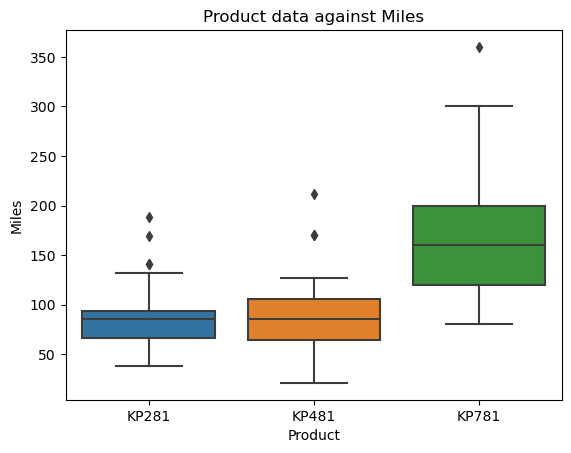

In [51]:
sns.boxplot(x='Product',y='Miles',data=df)
plt.title('Product data against Miles')

Text(0.5, 1.0, 'Product data against Miles')

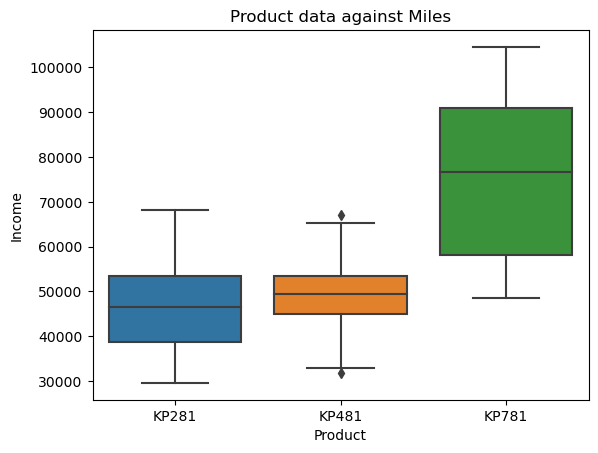

In [52]:
sns.boxplot(x='Product',y='Income',data=df)
plt.title('Product data against Miles')

**Missing Value & Outlier Detection**

In [53]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is no null values found.

In [54]:
df.duplicated().sum()

0

There is no duplicate values in the dataframe.

**Outliers**
Outliers for other categorical data are mentioned inline with the respective analysis

In [55]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range(IQR) for Miles is", miles_iqr)

Inter Quartile Range(IQR) for Miles is 48.75


**conversion of categorical attributes to 'category'**

In [56]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [57]:
df_cat['Fitness_category'].replace({1:'Poor Shape', 2: 'Bad Shape',
                                   3: 'Average Shape', 4: 'Good Shape',
                                   5: 'Excellent Shape'}, inplace = True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


* Categorization of Fitness Rating to following descriptive categories
* Poor Shape Bad Shape Average Shape Good Shape Excellent Shape

In [58]:
df_cat.Fitness_category.value_counts()

Average Shape      97
Excellent Shape    31
Bad Shape          26
Good Shape         24
Poor Shape          2
Name: Fitness_category, dtype: int64

In [59]:
df_cat['age_group'] = df_cat.Age
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,18
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,19
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,20


In [60]:
df_cat.age_group = pd.cut(df.age_group, bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Teen


In [61]:
salary_bins = [25000, 35000, 45000, 55000,65000, 85000, 110000]

# Create labels for the salary ranges
salary_labels = ['25K-35K', '35K-45K', '45K-55K', '55K-65K', '65K-85K', '85K-110K']

# Group the income column into salary ranges based on the bins and labels
df_cat['salary_range'] = pd.cut(df_cat['Income'], bins=salary_bins, labels=salary_labels)

# Create a cross-tabulation to see the preference of each product by salary range
product_preference = pd.crosstab(df_cat['Product'], df_cat['salary_range'])
product_preference

salary_range,25K-35K,35K-45K,45K-55K,55K-65K,65K-85K,85K-110K
Product,,,,,,
KP281,8,26,35,9,2,0
KP481,6,9,33,10,2,0
KP781,0,0,9,7,7,17


In [62]:
df_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [63]:
df_cat.loc[df_cat['Product'] == 'KP281', 'age_group'].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [64]:
df_cat.loc[df_cat['Product'] == 'KP481', 'age_group'].value_counts()

Adult          45
Teen            7
Middle Aged     7
Elder           1
Name: age_group, dtype: int64

In [65]:
df_cat.loc[df_cat['Product'] == 'KP781', 'age_group'].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [66]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [67]:
pd.crosstab(index=df_cat.Product, columns=df_cat.Fitness_category, margins=True)

Fitness_category,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape,All
Product,,,,,,
KP281,54,14,2,9,1,80
KP481,39,12,0,8,1,60
KP781,4,0,29,7,0,40
All,97,26,31,24,2,180


In [68]:
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,normalize='columns',margins=True)*100,2)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,58.82,41.48,50.00,50.00,44.44
KP481,41.18,33.33,31.82,16.67,33.33
KP781,0.00,25.19,18.18,33.33,22.22


In [69]:
pd.crosstab(index=[df_cat.Product, df_cat.Fitness_category],columns=df_cat.Gender)

Gender                    Female  Male
Product Fitness_category              
KP281   Average Shape         26    28
        Bad Shape             10     4
        Excellent Shape        1     1
        Good Shape             3     6
        Poor Shape             0     1
KP481   Average Shape         18    21
        Bad Shape              6     6
        Good Shape             4     4
        Poor Shape             1     0
KP781   Average Shape          1     3
        Excellent Shape        5    24
        Good Shape             1     6

In [70]:
pd.crosstab(index=[df_cat.Product, df_cat.Fitness_category], columns=df_cat.MaritalStatus)

MaritalStatus             Partnered  Single
Product Fitness_category                   
KP281   Average Shape            31      23
        Bad Shape                11       3
        Excellent Shape           1       1
        Good Shape                4       5
        Poor Shape                1       0
KP481   Average Shape            25      14
        Bad Shape                 7       5
        Good Shape                4       4
        Poor Shape                0       1
KP781   Average Shape             1       3
        Excellent Shape          17      12
        Good Shape                5       2

In [71]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

Conditional and Marginal Probabilities
Two-Way Contingency Table

Marginal Probabilities

In [72]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [73]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


**Marginal Probability**

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %

Marginal Probability of any customer buying product

product KP281 is : 44.44 % (entry level product)

product KP481 is : 33.33 % (intermediate user level product)

product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

**Conditional Probabilities**

In [74]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**The probability of selling a product**

**Female**

KP281 = 52 %

KP481 = 38 %

KP781 = 9 %

**Male** 

KP281 = 38 %

KP481 = 30 %

KP781 = 32 %

* Probability of Female customer buying KP281(52.63%) is more than male(38.46%).
* which shows KP281 is more recommended for female customers.
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
* Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )
* KP481 product is specifically recommended for Female customers who are intermediate user

In [75]:
np.round((pd.crosstab([df.Product],df.MaritalStatus,margins=True,normalize="columns"))*100,2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,44.86,43.84,44.44
KP481,33.64,32.88,33.33
KP781,21.50,23.29,22.22


**The probability of selling a product**

**Single** 

KP281 = 43 %

KP481 = 32 %

KP781 = 23 %

**Partner**

KP281 = 44 %

KP481 = 33 %

KP781 = 21 %

Probability of partners buying KP281(44.86%) is more than single (43.84%).
which shows KP281 is more used by single customers.
Probability of single customer buying Product KP781(23.29%) is more than partner(21.50%).

**Observation**
Customer profile for each AeroFit treadmill

**KP281**

* The entry-level product is affordable and has high sales.
* Among entry-level customers, the KP281 product is the most popular.
* Both male and female customers can easily afford this product.
* The average distance covered using this model is approximately 70 to 90 miles.
* Customers typically use this product 3 to 4 times per week.
* The majority of customers who purchased the product have rated their fitness level as average.
* This product is preferred by beginner-level customers, ranging from younger to elder age groups.
* Single female and partnered male customers tend to purchase this product more than single male customers.
* Customers with an income range between 39K to 53K have shown a preference for this product.

**KP481**

* Classified as an intermediate-level product.
* Among customers, the KP481 product ranks as the second most popular choice.
* The fitness level of users of this product varies from bad to average shape, depending on their usage.
* Customers primarily choose this product for covering more miles rather than focusing on fitness.
* On average, customers using this product cover a distance ranging from 70 to 130 miles per week.
* There is a higher preference for this product among female customers compared to male customers.
* Average Income of the customer who buys KP481 is 49K.
* Average Usage of this product is 3 days per week.
* More Partnered customers prefer this product.
* There are slightly more male buyers of the KP481.
* The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.
* The buyers of KP481 in Single & Partnered, Male & Female are same.
* The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

* Due to the High Price & being the advanced type, customer prefers less of this product.
* Customers use this product mainly to cover more distance.
* Customers who use this product have rated excelled shape as fitness rating.
* Customer walk/run average 120 to 200 or more miles per week on his product.
* Customers use 4 to 5 times a week at least.
* Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
* Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.
* Middle aged to higher age customers tend to use this model to cover more distance.
* Average Income of KP781 buyers are over 75K per annum

**Recommendation**

* The number of females preferring exercise equipment is very low. Therefore, a marketing campaign should be launched to encourage women to exercise more.
* KP281 and KP481 treadmills are popular among customers with an annual income ranging from 39K to 53K dollars. These models should be promoted as budget-friendly treadmills.
* Due to its additional features and functionalities, the KP781 treadmill should be marketed towards professionals and athletes.
* Influencers and international athletes should be used to promote the KP781 product.
* Research is needed to explore the potential market expansion beyond the age of 50, taking into account the health benefits and drawbacks.
* Provide customer support and recommend users to upgrade to the next level versions after consistent usage of lower versions.
* KP781 is recommended for female customers who exercise extensively, with easy usage guidance provided since it is an advanced model.
* Target customers above the age of 40 to recommend the KP781 product.